In [26]:
%matplotlib inline
import matplotlib
print matplotlib.__version__
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from numpy import nan
import matplotlib.patches as mpatches
from itertools import repeat
plt.rcParams.update({'font.size': 16})

2.1.0


In [27]:
def load_CvsGS_results():
    filename=open("../data/CombinedComparisons/PP_NR--WD_38484--combined_matrix-Gold_Standard.tsv")
    C1_pp_Naive_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/PR_NR--WD_38484--combined_matrix-Gold_Standard.tsv")
    C1_pr_Naive_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/PP_KR--WD_40717--combined_matrix-Gold_Standard.tsv")
    C1_pp_Knowledge_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/PR_KR--WD_40717--combined_matrix-Gold_Standard.tsv")
    C1_pr_Knowledge_df = pd.read_csv(filename,header = 0,delimiter="\t")
    
    filename=open("../data/CombinedComparisons/NR--WD_38484--GS_Dataset.tsv")
    C1_Jsim_and_In_Naive_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/KR--WD_40717--GS_Dataset.tsv")
    C1_Jsim_and_In_Knowledge_df = pd.read_csv(filename,header = 0,delimiter="\t")
    

    filename=open("../data/CombinedComparisons/PP_NR--AD_40674--combined_matrix-Gold_Standard.tsv")
    C2_pp_Naive_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/PR_NR--AD_40674--combined_matrix-Gold_Standard.tsv")
    C2_pr_Naive_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/PP_KR--AD_40718--combined_matrix-Gold_Standard.tsv")
    C2_pp_Knowledge_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/PR_KR--AD_40718--combined_matrix-Gold_Standard.tsv")
    C2_pr_Knowledge_df = pd.read_csv(filename,header = 0,delimiter="\t")

    filename=open("../data/CombinedComparisons/NR--AD_40674--GS_Dataset.tsv")
    C2_Jsim_and_In_Naive_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/KR--AD_40718--GS_Dataset.tsv")
    C2_Jsim_and_In_Knowledge_df = pd.read_csv(filename,header = 0,delimiter="\t")



    filename=open("../data/CombinedComparisons/PP_NR--NI_40676--combined_matrix-Gold_Standard.tsv")
    C3_pp_Naive_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/PR_NR--NI_40676--combined_matrix-Gold_Standard.tsv")
    C3_pr_Naive_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/PP_KR--NI_40716--combined_matrix-Gold_Standard.tsv")
    C3_pp_Knowledge_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/PR_KR--NI_40716--combined_matrix-Gold_Standard.tsv")
    C3_pr_Knowledge_df = pd.read_csv(filename,header = 0,delimiter="\t")

    filename=open("../data/CombinedComparisons/NR--NI_40676--GS_Dataset.tsv")
    C3_Jsim_and_In_Naive_df = pd.read_csv(filename,header = 0,delimiter="\t")
    filename=open("../data/CombinedComparisons/KR--NI_40716--GS_Dataset.tsv")
    C3_Jsim_and_In_Knowledge_df = pd.read_csv(filename,header = 0,delimiter="\t")



    return C1_pp_Naive_df['SimJ Partial Precision'],C1_pr_Naive_df['SimJ Partial Recall'],C1_pp_Knowledge_df['SimJ Partial Precision'],C1_pr_Knowledge_df['SimJ Partial Recall'],   C2_pp_Naive_df['SimJ Partial Precision'],C2_pr_Naive_df['SimJ Partial Recall'],C2_pp_Knowledge_df['SimJ Partial Precision'],C2_pr_Knowledge_df['SimJ Partial Recall'],  C3_pp_Naive_df['SimJ Partial Precision'],C3_pr_Naive_df['SimJ Partial Recall'],C3_pp_Knowledge_df['SimJ Partial Precision'],C3_pr_Knowledge_df['SimJ Partial Recall'],C1_Jsim_and_In_Naive_df['SimJ Score'],C1_Jsim_and_In_Naive_df['NIC Score'],C1_Jsim_and_In_Knowledge_df['SimJ Score'],C1_Jsim_and_In_Knowledge_df['NIC Score'],C2_Jsim_and_In_Naive_df['SimJ Score'],C2_Jsim_and_In_Naive_df['NIC Score'],C2_Jsim_and_In_Knowledge_df['SimJ Score'],C2_Jsim_and_In_Knowledge_df['NIC Score'],C3_Jsim_and_In_Naive_df['SimJ Score'],C3_Jsim_and_In_Naive_df['NIC Score'],C3_Jsim_and_In_Knowledge_df['SimJ Score'],C3_Jsim_and_In_Knowledge_df['NIC Score']

# Figure 1

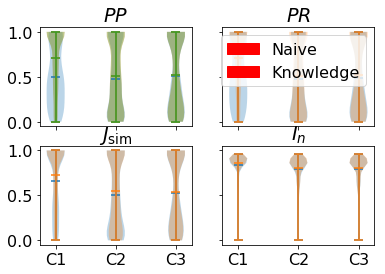

In [37]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]
red_patch = mpatches.Patch(color='red')
    # 'fake' invisible object
    
C1_pp_Naive_df,C1_pr_Naive_df,C1_pp_Knowledge_df,C1_pr_Knowledge_df,C2_pp_Naive_df,C2_pr_Naive_df,C2_pp_Knowledge_df,C2_pr_Knowledge_df,  C3_pp_Naive_df,C3_pr_Naive_df,C3_pp_Knowledge_df,C3_pr_Knowledge_df,C1_Jsim_Naive_df,C1_In_Naive_df,C1_Jsim_Knowledge_df,C1_In_Knowledge_df,C2_Jsim_Naive_df,C2_In_Naive_df,C2_Jsim_Knowledge_df,C2_In_Knowledge_df,C3_Jsim_Naive_df,C3_In_Naive_df,C3_Jsim_Knowledge_df,C3_In_Knowledge_df = load_CvsGS_results()
x=[1,2,3]
curators = ['C1','C1','C2','C3']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')


ax1data=[C1_pp_Naive_df,C2_pp_Naive_df,C3_pp_Naive_df]
ax1.violinplot(ax1data, x, points=20, widths=0.3, showmeans=True, showextrema=True, showmedians=False)
ax1data=[C1_pp_Knowledge_df,C2_pp_Knowledge_df,C3_pp_Knowledge_df]
ax1.violinplot(ax1data, x, points=20, widths=0.3, showmeans=True, showextrema=True, showmedians=False)
ax1.violinplot(ax1data, x, points=20, widths=0.3, showmeans=True, showextrema=True, showmedians=False)

    
ax1.title.set_text('$PP$')
quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)


legendlabels=[]
lines=[]
ax2data=[C1_pr_Naive_df,C2_pr_Naive_df,C3_pr_Naive_df]
lines.append(ax2.violinplot(ax2data, x, points=20, widths=0.3, showmeans=True, showextrema=True, showmedians=False))
legendlabels.append('Naive')
ax2data=[C1_pr_Knowledge_df,C2_pr_Knowledge_df,C3_pr_Knowledge_df]
lines.append(ax2.violinplot(ax1data, x, points=20, widths=0.3, showmeans=True, showextrema=True, showmedians=False))
ax2.title.set_text('$PR$')
legendlabels.append('Knowledge')
fake_handles = repeat(red_patch, len(x))
ax2.legend(fake_handles, legendlabels)

ax3data=[C1_Jsim_Naive_df,C2_Jsim_Naive_df,C3_Jsim_Naive_df]
ax3.violinplot(ax3data, x, points=20, widths=0.3,showmeans=True, showextrema=True, showmedians=False)
ax3data=[C1_Jsim_Knowledge_df,C2_Jsim_Knowledge_df,C3_Jsim_Knowledge_df]
ax3.violinplot(ax3data, x, points=20, widths=0.3,showmeans=True, showextrema=True, showmedians=False)
ax3.title.set_text(r'$J_{\mathrm{sim}}$')
ax3.set_xticklabels(curators)

ax4data=[C1_In_Naive_df,C2_In_Naive_df,C3_In_Naive_df]
ax4.violinplot(ax4data, x, points=20, widths=0.3,showmeans=True, showextrema=True, showmedians=False)
ax4data=[C1_In_Knowledge_df,C2_In_Knowledge_df,C3_In_Knowledge_df]
ax4.violinplot(ax4data, x, points=20, widths=0.3,showmeans=True, showextrema=True, showmedians=False)
ax4.title.set_text(r'$I_{n}$')
ax4.set_xticklabels(curators)

plt.show()

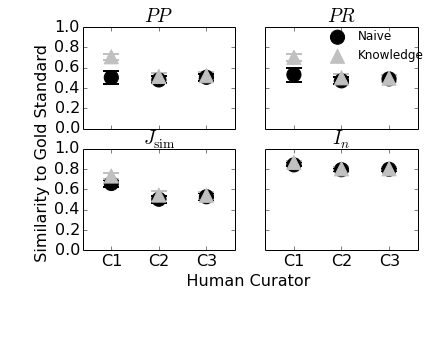

In [7]:
pp_Naive=[0.503,0.479,0.505]

pp_Knowledge=[0.707,0.513,0.521]

pr_Naive=[0.531,0.47,0.489]
pr_Knowledge=[0.702,0.5,0.496]

Jsim_Naive=[0.658,0.503,0.528]
Jsim_Knowledge=[0.732,0.544,0.542]

I_Naive=[0.842,0.794,0.798]
I_Knowledge=[0.865,0.803,0.803]

C1_pp_Naive_df,C1_pr_Naive_df,C1_pp_Knowledge_df,C1_pr_Knowledge_df,   C2_pp_Naive_df,C2_pr_Naive_df,C2_pp_Knowledge_df,C2_pr_Knowledge_df,  C3_pp_Naive_df,C3_pr_Naive_df,C3_pp_Knowledge_df,C3_pr_Knowledge_df,C1_Jsim_Naive_df,C1_In_Naive_df,C1_Jsim_Knowledge_df,C1_In_Knowledge_df,C2_Jsim_Naive_df,C2_In_Naive_df,C2_Jsim_Knowledge_df,C2_In_Knowledge_df,C3_Jsim_Naive_df,C3_In_Naive_df,C3_Jsim_Knowledge_df,C3_In_Knowledge_df = load_CvsGS_results()



Jsim_Naive_errorlist=[2*(np.std(C1_Jsim_Naive_df)/math.sqrt(len(C1_Jsim_Naive_df))),2*(np.std(C2_Jsim_Naive_df)/math.sqrt(len(C2_Jsim_Naive_df))),2*(np.std(C3_Jsim_Naive_df)/math.sqrt(len(C3_Jsim_Naive_df)))]
In_Naive_errorlist=[2*(np.std(C1_In_Naive_df)/math.sqrt(len(C1_In_Naive_df))),2*(np.std(C2_In_Naive_df)/math.sqrt(len(C2_In_Naive_df))),2*(np.std(C3_In_Naive_df)/math.sqrt(len(C3_In_Naive_df)))]

Jsim_Knowledge_errorlist=[2*(np.std(C1_Jsim_Knowledge_df)/math.sqrt(len(C1_Jsim_Knowledge_df))),2*(np.std(C2_Jsim_Knowledge_df)/math.sqrt(len(C2_Jsim_Knowledge_df))),2*(np.std(C3_Jsim_Knowledge_df)/math.sqrt(len(C3_Jsim_Knowledge_df)))]
In_Knowledge_errorlist=[2*(np.std(C1_In_Knowledge_df)/math.sqrt(len(C1_In_Knowledge_df))),2*(np.std(C2_In_Knowledge_df)/math.sqrt(len(C2_In_Knowledge_df))),2*(np.std(C3_In_Knowledge_df)/math.sqrt(len(C3_In_Knowledge_df)))]

pp_Naive_errorlist=[2*(np.std(C1_pp_Naive_df)/math.sqrt(len(C1_pp_Naive_df))),2*(np.std(C2_pp_Naive_df)/math.sqrt(len(C2_pp_Naive_df))),2*(np.std(C3_pp_Naive_df)/math.sqrt(len(C3_pp_Naive_df)))]
pr_Naive_errorlist=[2*(np.std(C1_pr_Naive_df)/math.sqrt(len(C1_pr_Naive_df))),2*(np.std(C2_pr_Naive_df)/math.sqrt(len(C2_pr_Naive_df))),2*(np.std(C3_pr_Naive_df)/math.sqrt(len(C3_pr_Naive_df)))]


pp_Knowledge_errorlist=[2*(np.std(C1_pp_Knowledge_df)/math.sqrt(len(C1_pp_Knowledge_df))),2*(np.std(C2_pp_Knowledge_df)/math.sqrt(len(C2_pp_Knowledge_df))),2*(np.std(C3_pp_Knowledge_df)/math.sqrt(len(C3_pp_Knowledge_df)))]
pr_Knowledge_errorlist=[2*(np.std(C1_pr_Knowledge_df)/math.sqrt(len(C1_pr_Knowledge_df))),2*(np.std(C2_pr_Knowledge_df)/math.sqrt(len(C2_pr_Knowledge_df))),2*(np.std(C3_pr_Knowledge_df)/math.sqrt(len(C3_pr_Knowledge_df)))]


x=[1,2,3]
curators = ['C1','C2','C3']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.scatter(x,pp_Naive,s=200,marker="o",color='black',zorder=2)
(_, caps, _)=ax1.errorbar(x,pp_Naive,yerr=pp_Naive_errorlist,linestyle='None',
   ecolor='black',capsize=8,zorder=1)
for cap in caps:
    cap.set_markeredgewidth(2)



ax1.scatter(x,pp_Knowledge,s=200,marker="^",color='silver',zorder=2)
(_, caps, _)=ax1.errorbar(x,pp_Knowledge,yerr=pp_Knowledge_errorlist,ls='none',ecolor='silver',capsize=8,zorder=1)
for cap in caps:
    cap.set_markeredgewidth(2)


ax1.set_xticks(x, minor=False)
ax1.set_xticklabels(curators)
ax1.title.set_text('$PP$')

lines=[]
legendlabels=[]
lines.append(ax2.scatter(x,pr_Naive,s=200,marker="o",color='black',zorder=2))
(_, caps, _)=ax2.errorbar(x,pr_Naive,yerr=pr_Naive_errorlist,ls='none',ecolor='black',capsize=8,zorder=1)
legendlabels.append('Naive')
for cap in caps:
    cap.set_markeredgewidth(2)
lines.append(ax2.scatter(x,pr_Knowledge,s=200,marker="^",color='silver',zorder=2))
(_, caps, _)=ax2.errorbar(x,pr_Knowledge,yerr=pr_Knowledge_errorlist,linestyle='None',ecolor='silver',capsize=8,zorder=1)
legendlabels.append('Knowledge')
for cap in caps:
    cap.set_markeredgewidth(2)
ax2.set_xticks(x, minor=False)
ax2.set_xticklabels(curators)
ax2.set_ylim(0,1)
ax2.title.set_text('$PR$')
plt.legend( lines, legendlabels, loc = 'lower center', bbox_to_anchor = (0.3,0.74,1,1),
bbox_transform = plt.gcf().transFigure,prop={'size': 12},frameon=False,numpoints=1,scatterpoints=1 )


ax3.scatter(x,Jsim_Naive,s=200,marker="o",color='black',zorder=2)
(_, caps, _)=ax3.errorbar(x,Jsim_Naive,yerr=Jsim_Naive_errorlist,linestyle='None',ecolor='black',capsize=8,zorder=1)
for cap in caps:
    cap.set_markeredgewidth(2)


ax3.scatter(x,Jsim_Knowledge,s=200,marker="^",color='silver',zorder=2)
(_, caps, _)=ax3.errorbar(x,Jsim_Knowledge,yerr=Jsim_Knowledge_errorlist,linestyle='None',ecolor='silver',capsize=8,zorder=1)
for cap in caps:
    cap.set_markeredgewidth(2)


ax3.title.set_text(r'$J_{\mathrm{sim}}$')
ax3.set_ylabel('                  Similarity to Gold Standard')
ax3.set_xlabel('                                   Human Curator')
ax3.set_xlim(0.4, 3.6)

ax4.scatter(x,I_Naive,s=200,marker="o",color='black',zorder=2)
(_, caps, _)=ax4.errorbar(x,I_Naive,yerr=In_Naive_errorlist,linestyle='None',ecolor='black',capsize=8,zorder=1)
for cap in caps:
    cap.set_markeredgewidth(2)


ax4.scatter(x,I_Knowledge,s=200,marker="^",color='silver',zorder=2)
(_, caps, _)=ax4.errorbar(x,I_Knowledge,yerr=In_Knowledge_errorlist,linestyle='None',ecolor='silver',capsize=8,zorder=1)
for cap in caps:
    cap.set_markeredgewidth(2)

ax4.set_ylim(0,1)
ax4.title.set_text(r'$I_{n}$')
ax4.set_xlim(0.4, 3.6)
plt.show()

# Figure 2

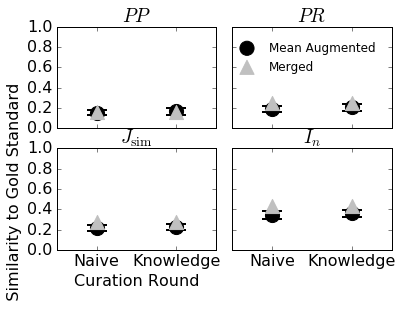

In [30]:
 
PP_C1Aug=[0.186 ,0.203]
PP_C2Aug=[0.136,0.145]
PP_C3Aug=[0.162,0.18]
PR_C1Aug=[0.227 ,0.243 ]
PR_C2Aug=[0.173, 0.183]
PR_C3Aug=[0.202,0.22]
Jsim_C1Aug=[0.249, 0.266]
Jsim_C2Aug=[0.194,0.206]
Jsim_C3Aug=[0.225,0.243]
I_C1Aug=[0.389,0.401]
I_C2Aug=[0.32,0.34]
I_C3Aug=[0.352,0.377]
PP_Merged=[0.155,0.155]
PR_Merged=[0.251,0.251]
Jsim_Merged=[0.276,0.276]
I_Merged=[0.429,0.429]
PP_Aug_N_Curators=[PP_C1Aug[0],PP_C2Aug[0],PP_C2Aug[0]]
PP_Aug_K_Curators=[PP_C1Aug[1],PP_C2Aug[1],PP_C2Aug[1]]
PR_Aug_N_Curators=[PR_C1Aug[0],PR_C2Aug[0],PR_C2Aug[0]]
PR_Aug_K_Curators=[PR_C1Aug[1],PR_C2Aug[1],PR_C2Aug[1]]
Jsim_Aug_N_Curators=[Jsim_C1Aug[0],Jsim_C2Aug[0],Jsim_C2Aug[0]]
Jsim_Aug_K_Curators=[Jsim_C1Aug[1],Jsim_C2Aug[1],Jsim_C2Aug[1]]
I_Aug_N_Curators=[I_C1Aug[0],I_C2Aug[0],I_C2Aug[0]]
I_Aug_K_Curators=[I_C1Aug[1],I_C2Aug[1],I_C2Aug[1]]


PP_Aug=[np.mean(PP_Aug_N_Curators),  np.mean(PP_Aug_K_Curators)]
PR_Aug=[np.mean(PR_Aug_N_Curators),  np.mean(PR_Aug_K_Curators)]
Jsim_Aug=[np.mean(Jsim_Aug_N_Curators),  np.mean(Jsim_Aug_K_Curators)]
I_Aug=[np.mean(I_Aug_N_Curators),  np.mean(I_Aug_K_Curators)]


PP_Aug_errorlist=[2*(np.std(PP_Aug_N_Curators)/math.sqrt(len(PP_Aug_N_Curators))), 2*(np.std(PP_Aug_K_Curators)/math.sqrt(len(PP_Aug_K_Curators)))]
PR_Aug_errorlist=[2*(np.std(PR_Aug_N_Curators)/math.sqrt(len(PR_Aug_N_Curators))), 2*(np.std(PR_Aug_K_Curators)/math.sqrt(len(PR_Aug_K_Curators)))]
Jsim_Aug_errorlist=[2*(np.std(Jsim_Aug_N_Curators)/math.sqrt(len(Jsim_Aug_N_Curators))), 2*(np.std(Jsim_Aug_K_Curators)/math.sqrt(len(Jsim_Aug_K_Curators)))]
I_Aug_errorlist=[2*(np.std(I_Aug_N_Curators)/math.sqrt(len(I_Aug_N_Curators))), 2*(np.std(I_Aug_K_Curators)/math.sqrt(len(I_Aug_K_Curators)))]


x=[1,2]
rounds = ['Naive','Knowledge']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.scatter(x,PP_Aug,color='black',s=200,marker="o",zorder=2)
(_, caps, _)=ax1.errorbar(x,PP_Aug,yerr=PP_Aug_errorlist,ls='none',ecolor='black',capsize=10,zorder=1)

ax1.scatter(x,PP_Merged,color='silver',s=200,marker="^",zorder=2)
for cap in caps:
    cap.set_markeredgewidth(2)


ax1.set_xticks(x, minor=False)
ax1.set_xticklabels(rounds)
ax1.title.set_text('$PP$')

ax2.scatter(x,PR_Aug,color='black',s=200,marker="o",zorder=2)
(_, caps, _)=ax2.errorbar(x,PR_Aug,yerr=PR_Aug_errorlist,ls='none',ecolor='black',capsize=10,zorder=1)

for cap in caps:
    cap.set_markeredgewidth(2)
ax2.scatter(x,PR_Merged,color='silver',s=200,marker="^",zorder=2)

ax2.set_xticks(x, minor=False)
ax2.set_xticklabels(rounds  )
ax2.set_ylim(0,1)
ax2.title.set_text('$PR$')

ax3.scatter(x,Jsim_Aug,color='black',s=200,marker="o",zorder=2)
(_, caps, _)=ax3.errorbar(x,Jsim_Aug,yerr=Jsim_Aug_errorlist,ls='none',ecolor='black',capsize=10,zorder=1)
for cap in caps:
    cap.set_markeredgewidth(2)
ax3.scatter(x,Jsim_Merged,color='silver',s=200,marker="^",zorder=2)
ax3.title.set_text(r'$J_{\mathrm{sim}}$')
ax3.set_ylabel('   Similarity to Gold Standard')
ax3.set_xlabel('Curation Round')
ax3.set_ylim(0,1)
ax3.set_xlim(0.5, 2.5)


lines=[]
legendlabels=[]
lines.append(ax4.scatter(x,I_Aug,color='black',s=200,marker="o",zorder=2))
(_, caps, _)=ax4.errorbar(x,I_Aug,yerr=I_Aug_errorlist,ls='none',ecolor='black',capsize=10,zorder=1)
legendlabels.append('Mean Augmented')
for cap in caps:
    cap.set_markeredgewidth(2)
lines.append(ax4.scatter(x,I_Merged,color='silver',s=200,marker="^",zorder=2))
legendlabels.append('Merged')
ax4.set_ylim(0,1)
ax4.set_xlim(0.5, 2.5)
ax4.title.set_text(r'$I_n$')
plt.legend( lines, legendlabels, loc = 'lower center', bbox_to_anchor = (0.20,0.7,1,1),bbox_transform = plt.gcf().transFigure,prop={'size': 12},frameon=False,numpoints=1,scatterpoints=1 )
fig.subplots_adjust(wspace=0.1)
plt.show()

# Figure 3

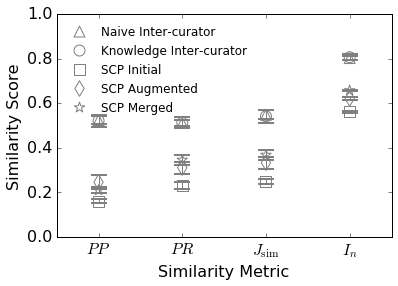

In [16]:
x=[1,2,3,4]
lines=[]
legendlabels=[]
# These are means across 3 curators
IntC_N=[0.524,0.511,0.548,0.802]
IntC_N_Curators=[[0.514,0.513,0.547],[0.499,0.508,0.526],[0.537,0.535,0.572],[0.807,0.794,0.807]]

IntC_K=[0.521,0.512,0.541,0.806]
IntC_K_Curators=[[0.531,0.489,0.543],[0.526,0.482,0.530],[0.554,0.506,0.565],[0.818,0.792,0.809]]

SCP_Initial=[0.160,0.231,0.249,0.561]
SCP_Initial_Curators=[[0.154,0.155,0.171],[0.214,0.228,0.250],[0.239,0.246,0.264],[0.556,0.564,0.564]]


SCP_Aug=[0.246,0.311,0.333,0.621]
SCP_Aug_Curators=[[0.266,0.21,0.264],[0.323,0.279,0.333],[0.35,0.3,0.349],[0.631,0.613,0.620]]

SCP_Merged=[0.210,0.346,0.368,0.657]
SCP_Merged_Curators=[[0.21,0.196,0.225],[0.343,0.323,0.373],[0.371,0.343,0.391],[0.657,0.655,0.659]]

fig, ax = plt.subplots()


metrics = ['$PP$','$PR$',r'$J_{\mathrm{sim}}$',r'$I_n$']
    

errorlist=[2*(np.std(IntC_N_Curators[0])/math.sqrt(len(IntC_N_Curators[0]))), 2*(np.std(IntC_N_Curators[1])/math.sqrt(len(IntC_N_Curators[1]))), 2*(np.std(IntC_N_Curators[2])/math.sqrt(len(IntC_N_Curators[2]))), 2*(np.std(IntC_N_Curators[3])/math.sqrt(len(IntC_N_Curators[3])))]
lines.append(plt.scatter(x,IntC_N,color="grey",marker="^",s=120,facecolors='none'))
(_, caps, _)=ax.errorbar(x,IntC_N,yerr=errorlist,ls='none',ecolor='grey',capsize=8,)
legendlabels.append('Naive Inter-curator')
for cap in caps:
    cap.set_markeredgewidth(2)

errorlist=[2*(np.std(IntC_K_Curators[0])/math.sqrt(len(IntC_K_Curators[0]))), 2*(np.std(IntC_K_Curators[1])/math.sqrt(len(IntC_K_Curators[1]))), 2*(np.std(IntC_K_Curators[2])/math.sqrt(len(IntC_K_Curators[2]))), 2*(np.std(IntC_K_Curators[3])/math.sqrt(len(IntC_K_Curators[3])))]
lines.append(plt.scatter(x,IntC_K,color='grey',marker="o",s=120,facecolors='none'))
(_, caps, _)=ax.errorbar(x,IntC_K,yerr=errorlist,ls='none',ecolor='grey',capsize=8,)
legendlabels.append('Knowledge Inter-curator')
for cap in caps:
    cap.set_markeredgewidth(2)

errorlist=[2*(np.std(SCP_Initial_Curators[0])/math.sqrt(len(SCP_Initial_Curators[0]))), 2*(np.std(SCP_Initial_Curators[1])/math.sqrt(len(SCP_Initial_Curators[1]))), 2*(np.std(SCP_Initial_Curators[2])/math.sqrt(len(SCP_Initial_Curators[2]))), 2*(np.std(SCP_Initial_Curators[3])/math.sqrt(len(SCP_Initial_Curators[3])))]
lines.append(plt.scatter(x, SCP_Initial,color='grey',marker="s",facecolors='none',s=120))
(_, caps, _)=ax.errorbar(x, SCP_Initial, yerr=errorlist,ls='none',ecolor='grey',capsize=8)
legendlabels.append('SCP Initial')
for cap in caps:
    cap.set_markeredgewidth(2)

errorlist=[2*(np.std(SCP_Aug_Curators[0])/math.sqrt(len(SCP_Aug_Curators[0]))), 2*(np.std(SCP_Aug_Curators[1])/math.sqrt(len(SCP_Aug_Curators[1]))), 2*(np.std(SCP_Aug_Curators[2])/math.sqrt(len(SCP_Aug_Curators[2]))), 2*(np.std(SCP_Aug_Curators[3])/math.sqrt(len(SCP_Aug_Curators[3])))]
lines.append(plt.scatter(x,SCP_Aug,color='grey',s=120,facecolors='none',marker="d"))
(_, caps, _)=ax.errorbar(x,SCP_Aug,yerr=errorlist,ls='none',ecolor='grey',capsize=8,)
legendlabels.append('SCP Augmented')
for cap in caps:
    cap.set_markeredgewidth(2)


errorlist=[2*(np.std(SCP_Merged_Curators[0])/math.sqrt(len(SCP_Merged_Curators[0]))), 2*(np.std(SCP_Merged_Curators[1])/math.sqrt(len(SCP_Merged_Curators[1]))), 2*(np.std(SCP_Merged_Curators[2])/math.sqrt(len(SCP_Merged_Curators[2]))), 2*(np.std(SCP_Merged_Curators[3])/math.sqrt(len(SCP_Merged_Curators[3])))]


lines.append(plt.scatter(x,SCP_Merged,color='grey',facecolors='none',s=120,marker="*"))
(_, caps, _)=ax.errorbar(x,SCP_Merged,yerr=errorlist,ecolor='grey',capsize=8, ls='none')
legendlabels.append('SCP Merged')
for cap in caps:
    cap.set_markeredgewidth(2)
    
ax.set_xlim(0.5,4.5)
ax.set_xticks(x, minor=False)
ax.set_xticklabels(metrics)
ax.set_ylim(0,1)
ax.set_xlabel('Similarity Metric')
ax.set_ylabel('Similarity Score')
plt.legend(lines,legendlabels,loc='upper left', frameon=False, prop={'size': 12},numpoints=1,scatterpoints=1)
plt.show()